# Health Sites Near You
Name: Thea Ellen Go<br>
Section: S12

### How many health-related amenities are there in provinces where you, your family, and relatives are currently residing in?

In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

plt.style.use('seaborn-whitegrid')

%pylab inline

Populating the interactive namespace from numpy and matplotlib


### Load Data

In [2]:
ph = gpd.read_file('./datasets/gadm36_PHL_shp/gadm36_PHL_1.shp')
ph.head()

,GID_0,NAME_0,GID_1,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1,geometry
0,PHL,Philippines,PHL.1_1,Abra,None,None,Lalawigan|Probinsya,Province,1401,PH.AB,"POLYGON ((120.77473 17.16318, 120.76637 17.159..."
1,PHL,Philippines,PHL.2_1,Agusan del Norte,None,None,Lalawigan|Probinsya,Province,1602,PH.AN,"POLYGON ((125.44627 8.66631, 125.44199 8.66333..."
2,PHL,Philippines,PHL.3_1,Agusan del Sur,None,None,Lalawigan|Probinsya,Province,1603,PH.AS,"POLYGON ((125.90923 7.99845, 125.90176 7.99794..."
3,PHL,Philippines,PHL.4_1,Aklan,None,None,Lalawigan|Probinsya,Province,604,PH.AK,"MULTIPOLYGON (((122.42083 11.63194, 122.42000 ..."
4,PHL,Philippines,PHL.5_1,Albay,None,None,Lalawigan|Probinsya,Province,505,PH.AL,"MULTIPOLYGON (((123.28764 13.04923, 123.28686 ..."


In [3]:
healthsites = gpd.read_file( './datasets/philippines.geojson', driver='GeoJSON')
healthsites.head()

,osm_id,osm_type,completeness,is_in_health_zone,amenity,speciality,addr_street,operator,water_source,changeset_id,...,changeset_user,wheelchair,beds,url,dispensing,healthcare,operator_type,part_time_beds,tag,geometry
0,4714668590,node,9.0,,pharmacy,,,,,46542719.0,...,Innoc,,,,,,,None,None,POINT (122.63445 10.94470)
1,6489465986,node,9.0,,doctors,,,,,70494207.0,...,RenAshbell,,,,,,,None,None,POINT (124.24163 8.22731)
2,775561027,way,31.0,,hospital,,Dalan na Pagayaya,Department of Health,,81346192.0,...,mapbeks,,,,,hospital,government,None,None,"POLYGON ((121.74563 17.65639, 121.74616 17.657..."
3,497119467,node,15.0,,pharmacy,,Shorthorn,,,86331991.0,...,mipangan,,,,,,,None,None,POINT (121.02008 14.66840)
4,601647960,way,12.0,,hospital,,,,,60145823.0,...,GOwin,,,,,,,None,None,"POLYGON ((120.45718 15.80609, 120.45738 15.806..."


### Projections

In [4]:
ph.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [5]:
healthsites.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

### Amenities
Check the different amenities

In [6]:
healthsites['amenity'] = healthsites['amenity'].replace(to_replace ='', value ='health amenity')
amenities = healthsites['amenity'].unique().tolist()
print(amenities)

['pharmacy', 'doctors', 'hospital', 'clinic', 'dentist', 'health amenity', 'laboratory', 'social_facility', 'healthcare']


### Provinces
We will be using:
1. Iloilo
2. Cebu
3. Metropolitan Manila

## Iloilo

In [7]:
ilo = ph[ph.NAME_1=="Iloilo"]

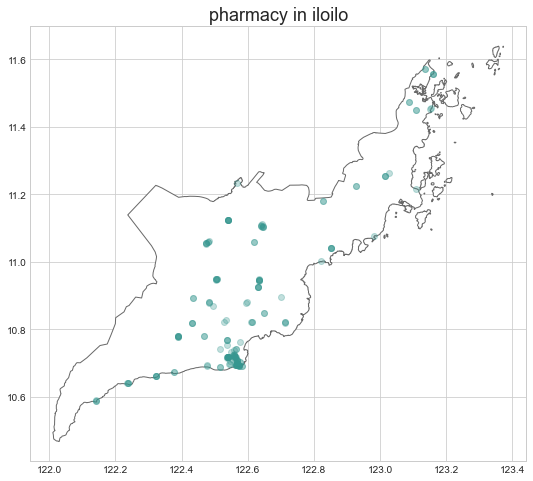

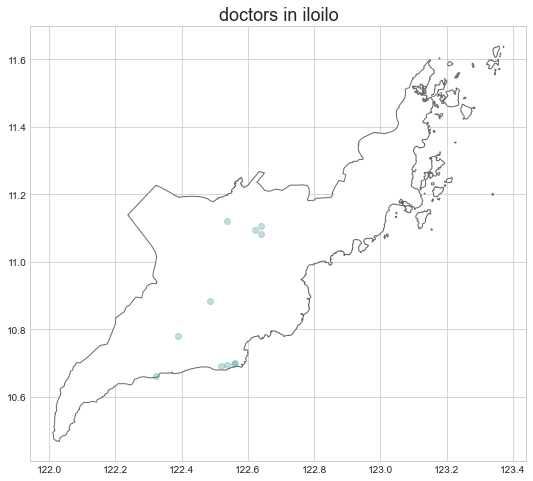

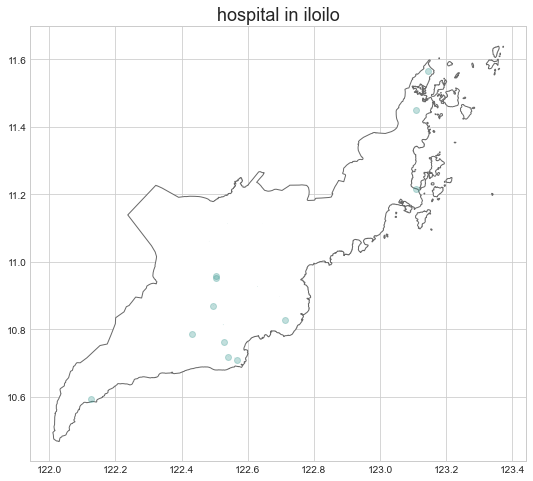

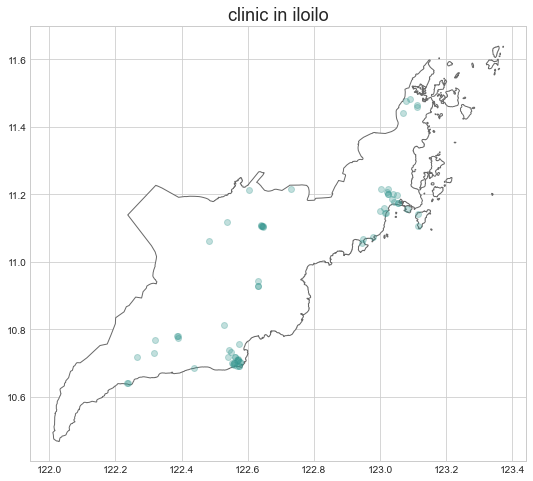

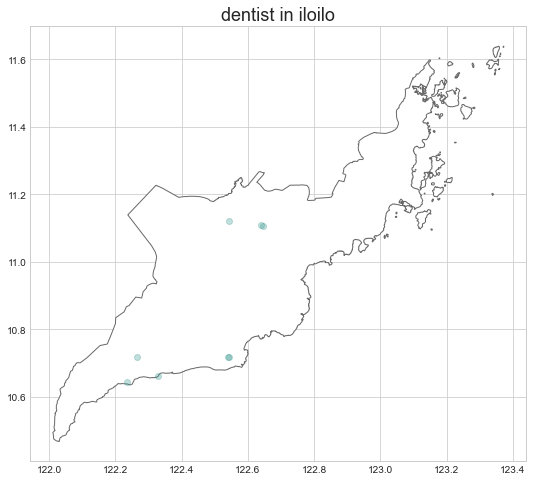

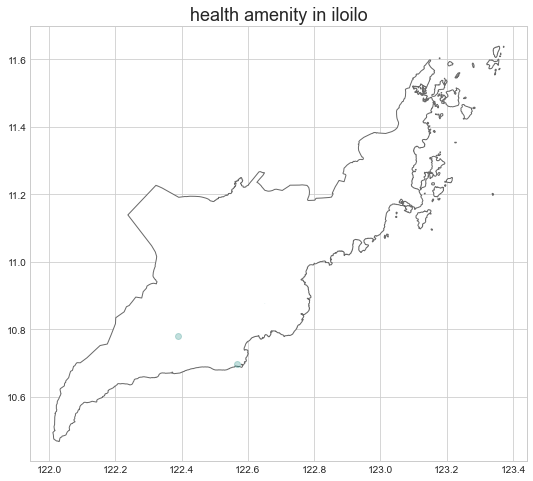

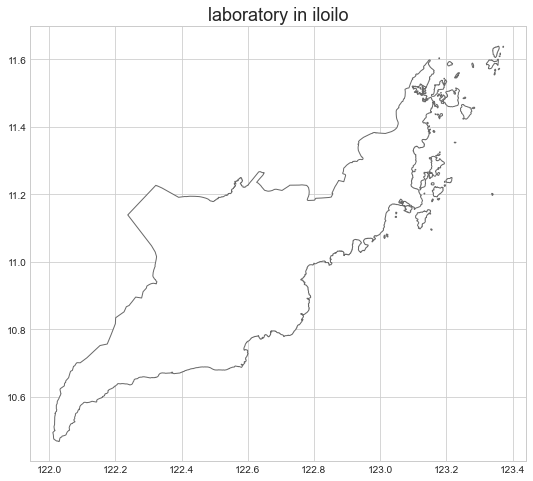

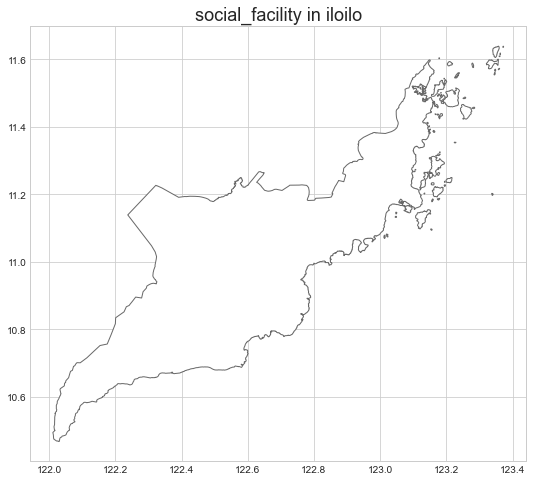

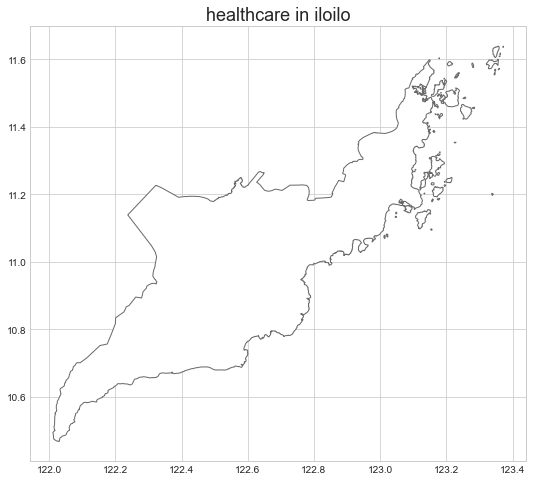

In [8]:
for i in amenities:
    ax = ilo.plot(figsize=(10,8), color='white', edgecolor='dimgray')
    joined = gpd.sjoin(healthsites[healthsites['amenity'] == i], ilo, op='within')
    if (len(joined) > 0): joined.plot(ax=ax, alpha=0.3, color="#369790")
    ax.set_title(i + ' in iloilo', fontsize=18)
    plt.savefig('./viz/iloilo/' + i + '.png')
    plt.show()

## Cebu

In [9]:
cebu = ph[ph.NAME_1=="Cebu"]

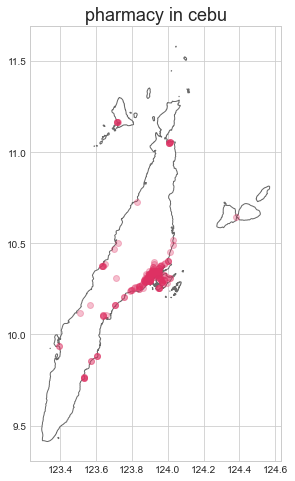

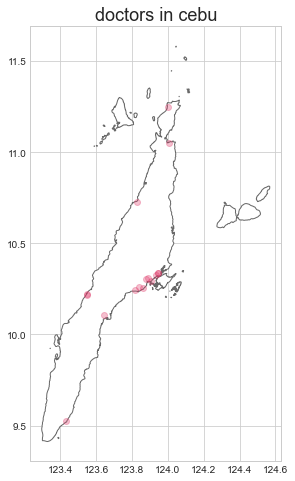

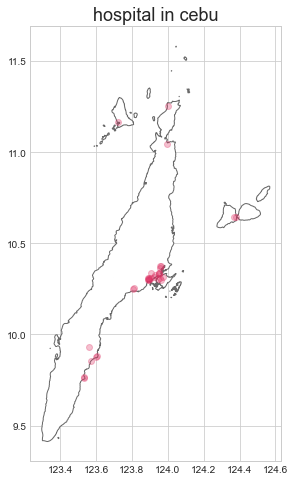

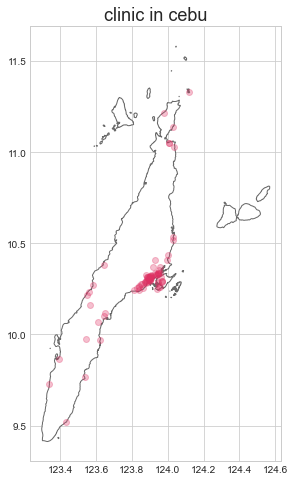

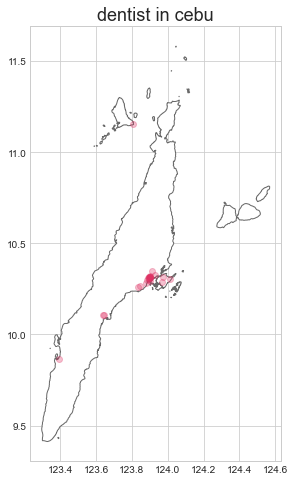

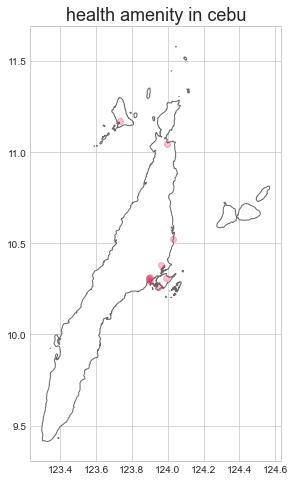

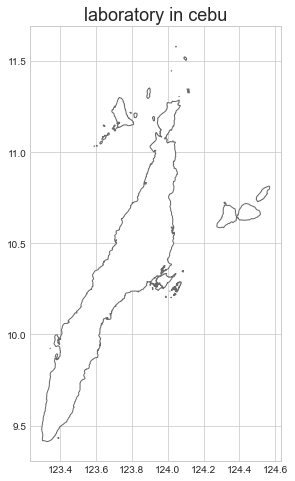

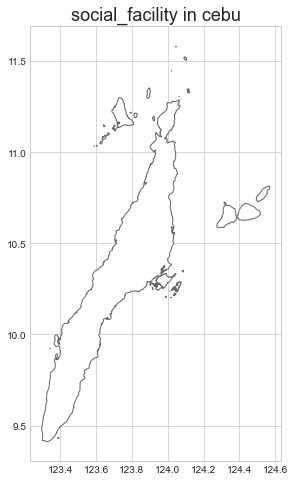

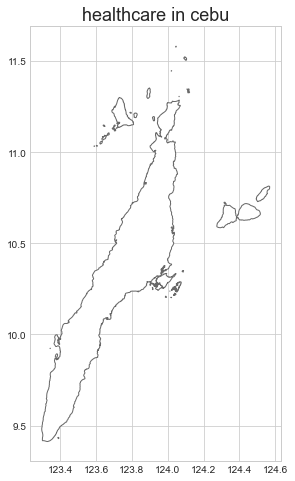

In [10]:
for i in amenities:
    ax = cebu.plot(figsize=(10,8), color='white', edgecolor='dimgray')
    joined = gpd.sjoin(healthsites[healthsites['amenity'] == i], cebu, op='within')
    if (len(joined) > 0): joined.plot(ax=ax, alpha=0.3, color="#DE3163")
    ax.set_title(i + ' in cebu', fontsize=18)
    plt.savefig('./viz/cebu/' + i + '.png')
    plt.show()

## Metropolitan Manila

In [11]:
mnl = ph[ph.NAME_1=="Metropolitan Manila"]

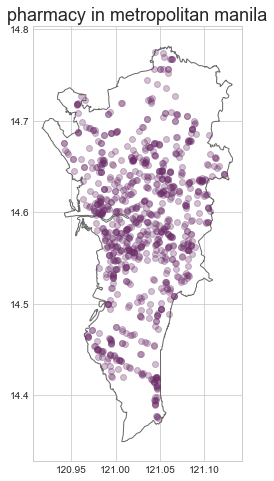

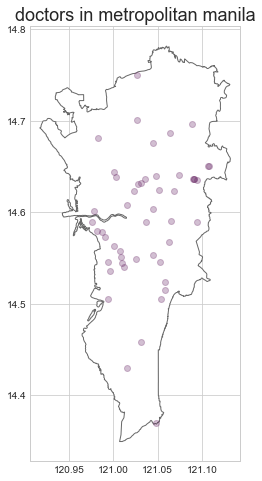

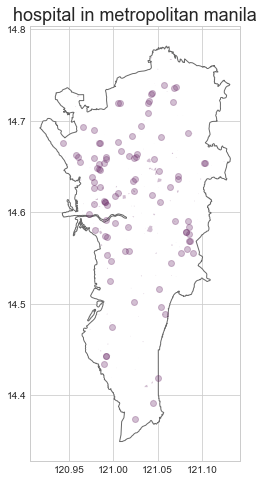

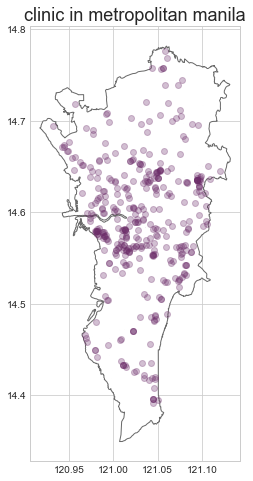

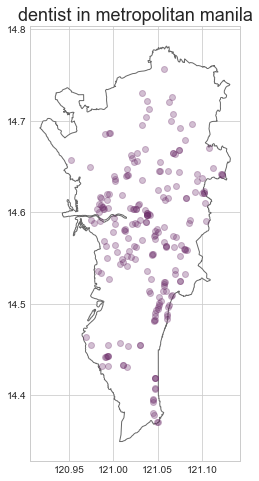

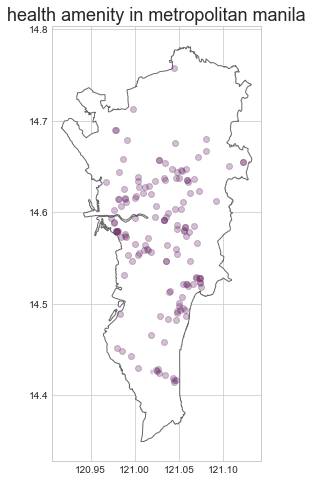

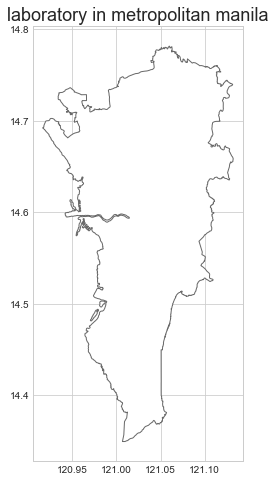

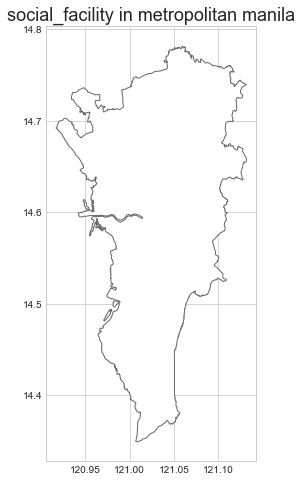

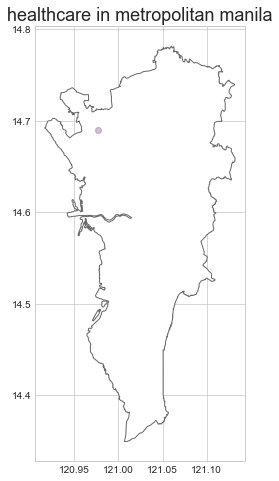

In [12]:
for i in amenities:
    ax = mnl.plot(figsize=(10,8), color='white', edgecolor='dimgray')
    joined = gpd.sjoin(healthsites[healthsites['amenity'] == i], mnl, op='within')
    if (len(joined) > 0): joined.plot(ax=ax, alpha=0.3, color="#6D2E6A")
    ax.set_title(i + ' in metropolitan manila', fontsize=18)
    plt.savefig('./viz/mnl/' + i + '.png')
    plt.show()